In [1]:
pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=424411133036c3f5e87561134f007580c9f54ab5d561b86fcf219f9e57a750d0
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


## 演習5-1（応用）
* 折れ線グラフで3種類の線を描画してください。
* マーカー・線の色・線のスタイル・ラベルをそれぞれ変えてプロットしてください。
* 凡例を表示してください。
* 画像サイズ(figsize)をデフォルトから変更してください。
* この処理を関数として定義してください。
* subplotsでfig, axesを作成してください。
* データは自由ですが、もし思いつかない場合は以下を利用してください。
* (マーカー: marker などは本章ではでてきていないため、調べて実装する必要があります。調べてもわからない場合は聞いてください。また、実務ではこういった可視化の際に区別できる設定をすることが多いです。)


```
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)
```



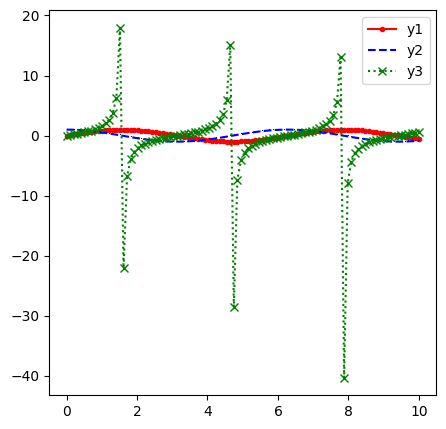

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# グラフを表示する関数を定義
def create_graph(x, y1, y2, y3):
    # 画像サイズを変更
    fig, axes = plt.subplots(figsize=(5, 5))

    # グラフの書式を変更
    axes.plot(x, y1, marker=".", color="red", linestyle="-", label="y1")
    axes.plot(x, y2, marker=",", color="blue", linestyle="--", label="y2")
    axes.plot(x, y3, marker="x", color="green", linestyle=":", label="y3")

    # 凡例を表示
    axes.legend()

    # グラフを表示
    plt.show()


x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)

# 関数を呼び出す
create_graph(x, y1, y2, y3)

## 演習5-2 (応用)
* 標準正規分布からランダムなデータを10000個作成しヒストグラムに描画してください。
* その際、全体の平均値を計算し、axvlineで描画してください。
* x軸・y軸・タイトルを設定してください。
* subplotsでfig, axesを作成してください。

(array([1.000e+00, 2.200e+01, 1.770e+02, 8.830e+02, 2.290e+03, 3.211e+03,
        2.349e+03, 8.680e+02, 1.770e+02, 2.200e+01]),
 array([-4.49373903, -3.67492118, -2.85610334, -2.03728549, -1.21846765,
        -0.3996498 ,  0.41916804,  1.23798589,  2.05680373,  2.87562158,
         3.69443942]),
 <BarContainer object of 10 artists>)

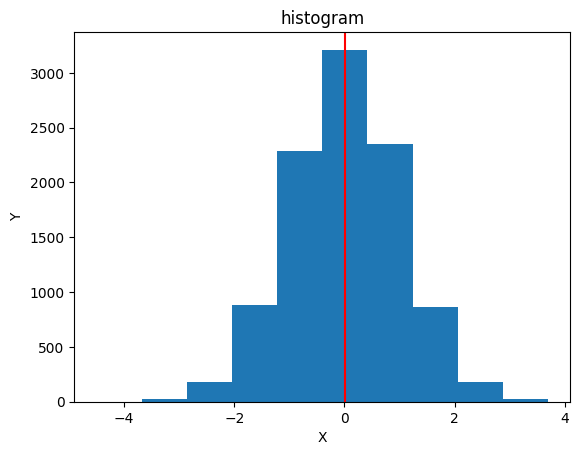

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# 標準正規分布からランダムに生成
x = np.random .normal(0, 1, 10000)
fig, axes = plt.subplots()

# 平均線を定義
axes.axvline(np.mean(x), color="red")

# タイトルと軸を設定
axes.set(xlabel="X",ylabel="Y",title="histogram")

# ヒストグラムを出力
plt.hist(x)

## 演習5-3 (応用)
* 箱ひげ図を1つのサブプロットに2つ表示させてください。
* その際、X軸・Y軸・タイトルを日本語で定義してください。
* 各ラベル名を定義してください。
* 凡例(legend)を定義してください。
* fig, axesを定義してください。
* 関数として定義し、第一引数・第二引数にそれぞれデータを渡せるようにしてください。なお、第三引数以降を定義しても構いません。

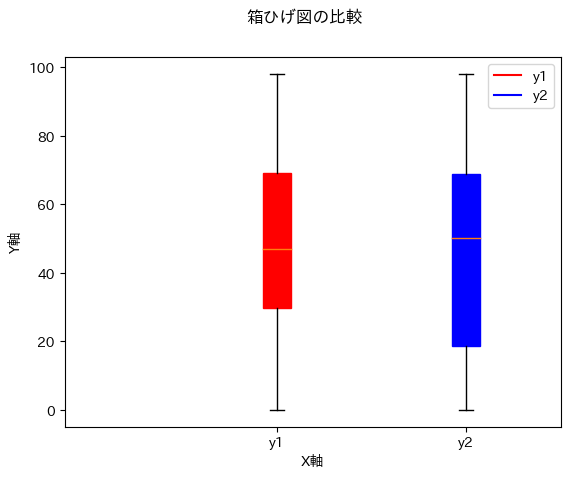

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

# 2つの箱ひげ図を比較する関数を定義
def create_boxplots(y1, y2):
    # 描画範囲を定義
    fig, axes = plt.subplots()
    fig.suptitle("箱ひげ図の比較")

    # 箱ひげ図を設定する
    bp = axes.boxplot([y1, y2],labels=["y1", "y2"], patch_artist=True)
    bp["boxes"][0].set_color("red")
    bp["boxes"][1].set_color("blue")
    axes.set(xlabel="X軸", ylabel="Y軸")

    # 箱ひげ図の凡例を設定する
    """
    https://ami-gs.hatenablog.com/entry/2014/07/04/103356
    """

    y1_legend, = axes.plot([1, 1], color="red", label="y1")
    y2_legend, = axes.plot([1, 1], color="blue", label="y2")
    axes.legend()
    y1_legend.set_visible(False)
    y2_legend.set_visible(False)
    plt.show()

y1 = np.random.randint(0, 100, 100)
y2 = np.random.randint(0, 100, 50)

# 関数を呼び出す
create_boxplots(y1, y2)

## 演習5-4 (応用)
* 以下のクラスを作成してください。
* plot_bar で棒グラフを作成するメソッド。引数はデータを必須で受け取る。ラベル名は任意だが初期値を設定する。
* plot_hist でヒストグラムを作成するメソッド。引数はデータを必須で受け取る。binのサイズは任意だが初期値を設定する。
* plot_polyline で折れ線グラフを作成するメソッド。引数はデータを必須で受け取る。
* コンストラクタ内部ではfig, axesを作成しておく。各メソッドではそのfig, axesを利用すること。
* 以下は呼び出し例です。


```
# クラスのインスタンス化
plot_generator = PlotGenerator()

# 棒グラフの作成
data = [10, 20, 30, 40, 50]
labels = ['A', 'B', 'C', 'D', 'E']
plot_generator.plot_bar(data, labels)

# ヒストグラムの作成
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plot_generator.plot_hist(data, bins=5)

# 折れ線グラフの作成
data = [10, 20, 15, 25, 30]
plot_generator.plot_polyline(data)
```



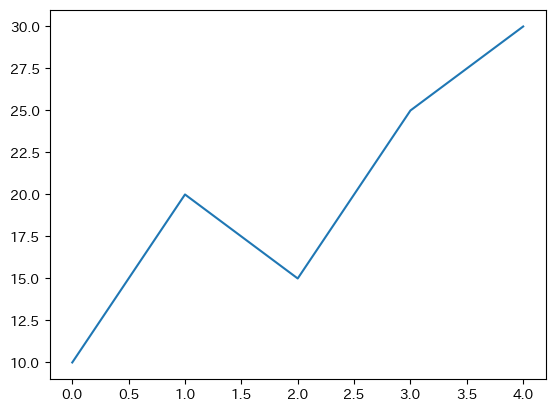

In [110]:
import numpy as np
import matplotlib.pyplot as plt

class PlotGenerator:
    def __init__(self):
        # 属性を定義する
        self.fig, self.axes = plt.subplots()

    def plot_bar(self, data, label="a"):
        x = range(len(data))
        self.axes.bar(x,data,tick_label=label)

    def plot_hist(self, data, bins=50):
        self.axes.hist(data,bins=bins)

    def plot_polyline(self, data):
        self.axes.plot(data)


# クラスのインスタンス化
plot_generator = PlotGenerator()

"""
# 棒グラフの作成
data = [10, 20, 30, 40, 50]
labels = ['A', 'B', 'C', 'D', 'E']
plot_generator.plot_bar(data, labels)


# ヒストグラムの作成
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plot_generator.plot_hist(data, bins=5)

"""
# 折れ線グラフの作成
data = [10, 20, 15, 25, 30]
plot_generator.plot_polyline(data)



## 演習5-5 (応用)
* サブプロットを4つ作成し、それぞれにヒストグラムを描画してください。ヒストグラムのデータは正規分布からランダムに生成してください。サブプロットの設定にはfor文を利用してください。
* 詳細な要件
* 2行2列のサブプロットを作成し、サイズは横10インチ、縦6インチとしてください。
* 4つのヒストグラムのデータは、それぞれ平均0、標準偏差1の正規分布からランダムに1000個のデータを生成してください。
* 4つのヒストグラムのタイトルは、それぞれ「正規分布1」、「正規分布2」、「正規分布3」、「正規分布4」としてください。
* 4つのヒストグラムの色は、それぞれ赤、緑、青、黄色としてください。
* ヒストグラムのビンの数は20に設定してください。
* ヒストグラムの透明度は0.7に設定してください。
* x軸のラベルは「値」、y軸のラベルは「度数」としてください。
* for文を使って、4つのサブプロットに対する設定を一括で行ってください。(ヒント: サブプロットをflatで一次元配列にすると楽です)
* 最後に、グラフを表示してください。


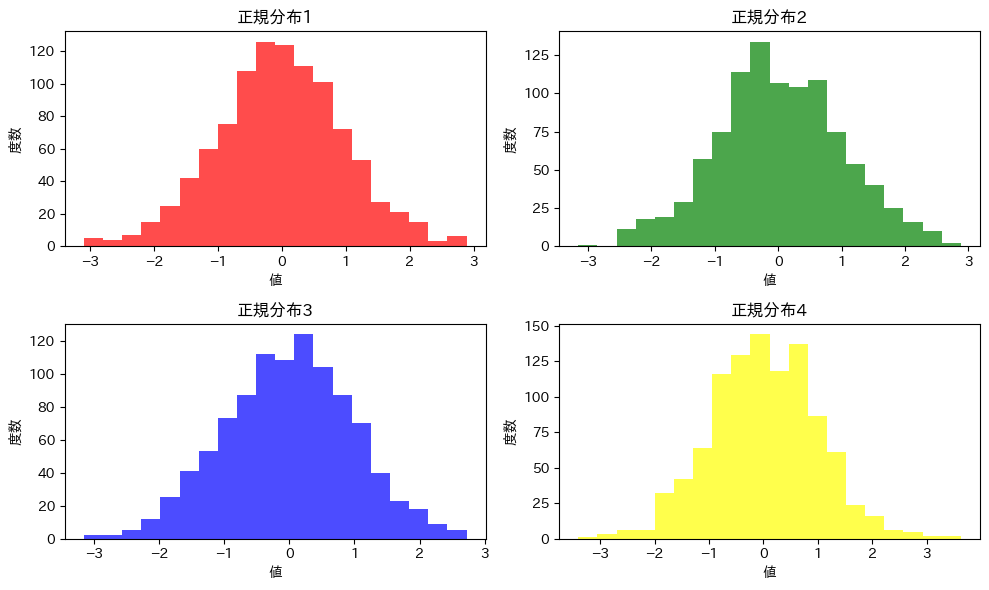

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

# リストを定義
names = ["正規分布1", "正規分布2", "正規分布3", "正規分布4"]
colors = ["red", "green", "blue", "yellow"]
fig, axes = plt.subplots(2, 2, figsize=(10, 6), tight_layout=True)
axes_flat = axes.ravel()

# サブプロットに設定を行う
for name, color, ax in zip(names, colors, axes_flat):
    x = np.random .normal(0, 1, 1000)
    ax.hist(x, color=color, bins=20, alpha=0.7)
    ax.set(xlabel="値", ylabel="度数", title=name)

plt.show()

